## Урок 10. Домашнее задание 

### 10.1 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

In [1]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_mutual_info_score

In [2]:
with open('clustering.pkl', 'rb') as f:
    data = pickle.load(f)

X = data['X']
Y = data['Y']

In [3]:
# Модель из урока
model = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X)

score = silhouette_score(X, model.labels_)
print(f"Метрика силуэтта для k=3: {score}")

Метрика силуэтта для k=3: 0.4523966375832621


In [4]:
model = KMeans(n_clusters=4, random_state=42, n_init=10).fit(X)

score = silhouette_score(X, model.labels_)
print(f"Метрика силуэтта для k=4: {score}")

Метрика силуэтта для k=4: 0.4433754926522356


*Метрика силуэта ухудшилась*


### 10.2 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше по метрике AMI?

In [5]:
model = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X)
y_pred = model.fit_predict(X)

score = adjusted_mutual_info_score(Y, y_pred)
print(f"AMI для k=3: {score}")

AMI для k=3: 0.6138984071108893


In [6]:
model = KMeans(n_clusters=4, random_state=42, n_init=10).fit(X)
y_pred = model.fit_predict(X)

score = adjusted_mutual_info_score(Y, y_pred)
print(f"AMI для k=4: {score}")

AMI для k=4: 0.5835423055834893


*Метрика AMI ухудшилась*

In [7]:
decresing = False
decresing_n = 0
prev = None

best_k = None
best_ami = None

for k in range(2, 100):
  model = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
  y_pred = model.fit_predict(X)

  score = adjusted_mutual_info_score(Y, y_pred)
  print(f"k={k}; AMI = {score:.4f}")

  if best_ami is None:
    best_ami = score
    best_k = k
  else:
    if best_ami < score:
      best_ami = score
      best_k = k

  if prev is None:
    prev = score
  else:
    if score < prev:
      decresing = True

  if decresing:
    decresing_n += 1

  if decresing_n > 10:
    break

print(f'Лучшая метрика AMI={best_ami} при k={best_k}')

k=2; AMI = 0.9286
k=3; AMI = 0.6139
k=4; AMI = 0.5835
k=5; AMI = 0.5359
k=6; AMI = 0.4917
k=7; AMI = 0.4824
k=8; AMI = 0.4524
k=9; AMI = 0.4363
k=10; AMI = 0.4103
k=11; AMI = 0.3974
k=12; AMI = 0.3820
k=13; AMI = 0.3840
Лучшая метрика AMI=0.9286022516535728 при k=2



### 10.3 Домашнее задание высокого уровня

Загрузите датасет `clustering_hw.csv` из приложенной директории `data` и визуализируйте данные. Должно получится как-то так:

![clustering_hw](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_hw.png)

В рамках домашней работы

1. вычислите оптимальное количество кластеров $k$
1. обучите k-means с количеством кластеров  $k$
1. к какому кластеру принадлежит точка $x=(5, 8)$? к какому кластеру принадлежит точка $x=(0, 5)$? Они принадлежат к разным кластерам или одному?
1. Каково качество кластеризации по AMI

In [8]:
df = pd.read_csv('clustering_hw.csv')
df.head()
X = df[['x1', 'x2']]
Y = df[['y']]

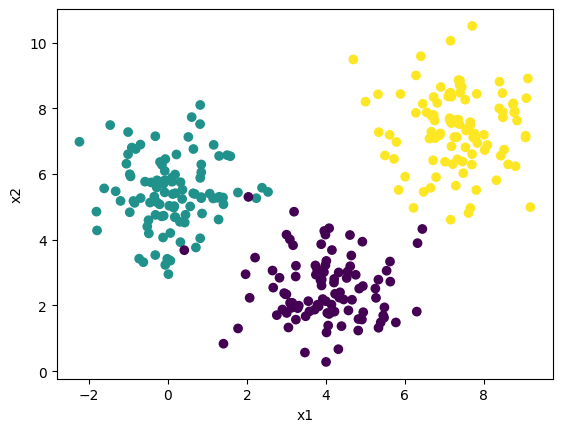

In [9]:
plt.scatter(df['x1'], df['x2'], c=df['y'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [10]:
decresing = False
decresing_n = 0
prev = None

best_k = None
best_silhouette = None

for k in range(2, 10):
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  
  if best_silhouette is None:
    best_silhouette = score
    best_k = k
  else:
    if best_silhouette < score:
      best_silhouette = score
      best_k = k

  if prev is None:
    prev = score
  else:
    if score < prev:
      decresing = True

  if decresing:
    decresing_n += 1

  if decresing_n > 10:
    break

print(f'Оптимальное количество кластеров: k={best_k} (silhouette_score={best_silhouette})')

Оптимальное количество кластеров: k=3 (silhouette_score=0.6512697926145397)


In [11]:
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10).fit(X)
kmeans.fit(X);

In [12]:
points = pd.DataFrame({'x1': [5, 0], 'x2': [8, 5]})
points['cluster'] = kmeans.predict(points)
print('Точки принадлежат к разным кластерам ? {}'.format(
    points.loc[0, 'cluster'] != points.loc[1, 'cluster'])
)
points

Точки принадлежат к разным кластерам ? True


,x1,x2,cluster
0,5,8,1
1,0,5,0


In [13]:
AMI = adjusted_mutual_info_score(Y['y'], kmeans.labels_)
print("AMI:", AMI)

AMI: 0.9700074953683859


### Заключение

Мы познакомились с двумя метриками

* Silhouette. Её используем, когда есть только сами объекты, а метки кластеров отсутствуют в обучающей выборке
* AMI. Её используем, когда известны "истинные" метки кластеров

Метрик намного больше - о них можно почитать [ в документации sklearn](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)